# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [25]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [26]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

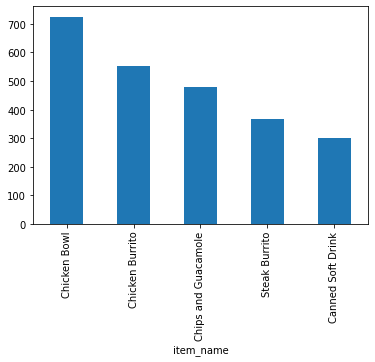

In [27]:
chipo.groupby('item_name')['order_id'].count().sort_values(ascending=False).iloc[0:5].plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [28]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [29]:
chipo['item_price'] = chipo.item_price.str.replace('$', '').astype(float)


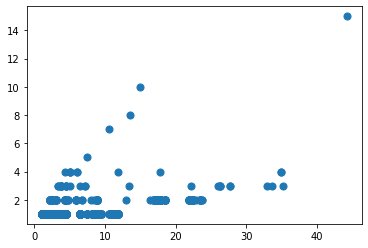

In [33]:
plt.scatter(chipo.item_price, chipo.quantity, s = 50)

### Step 7. BONUS: Create a question and a graph to answer your own question.

<BarContainer object of 4622 artists>

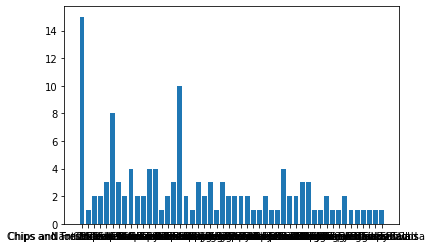

In [35]:
plt.bar(chipo.item_name, chipo.quantity)

In [44]:
grouped = chipo.groupby('item_name', as_index=False)['quantity'].agg(['sum', 'count'])

In [46]:
grouped['quantity_per_order'] = grouped['sum'] / grouped['count']

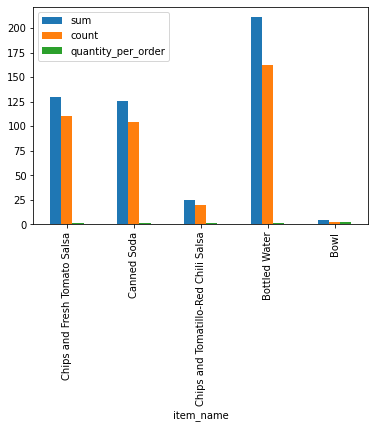

In [53]:
grouped.sort_values('quantity_per_order').tail().plot(kind='bar')